# Turbulence numerical explorations
## Lecture 1

Author: Enrico Calzavarini enrico.calzavarini@univ-lille.fr

This is a set of 4 lectures aimed at exploring numerically a set of data from Homogeneous and isotropic turbulence. This is part of an introductory course in turbulence. The phylosophy of this course is *from learn to code to code to learn* and are inspired by similar lectures by ... This means that we aim at learning on turbulence through computing programs. 

First we read turbulent flow field data from a file. 
We learn ho to read data from a **hdf5** file, how to write and read again the data in **binary format**, how to generate a synthetic velocity field (here the *cellular flow field*) which we wil use in the following. 

In [1]:
from math import *
import numpy as np
import h5py

fname="../HIT_128/field_10000.h5"
f = h5py.File( fname,'r')

vx=np.array(f['euler']['velocity_x'])
vy=np.array(f['euler']['velocity_y'])
vz=np.array(f['euler']['velocity_z'])

NZ = vx.shape[0]
NY = vx.shape[1]
NX = vx.shape[2]
print(NX,NY,NZ)

# for future debugging we create a cellular flow field
cellular = False # this is the flag to activate it

if cellular == True :
    for i in range(NX):
        for j in range(NY):
            for k in range(NZ):
                vx[k][j][i]=np.cos(2.*np.pi/NX*i)*np.sin(2.*np.pi/NY*j)
                vy[k][j][i]=-np.sin(2.*np.pi/NX*i)*np.cos(2.*np.pi/NY*j)
                vz[k][j][i]=0

                
# write data on a file
file_path = "../HIT_128/field_10000.bin"

with open(file_path, "wb") as file:
    file.write(vx)
    file.write(vy)
    file.write(vz)
    file.close()

# read data from file
with open(file_path, "rb") as file:
    data = np.fromfile(file, dtype=float)
    file.close()
size=int(len(data)/3)
vrx = data[0:size].reshape(NX,NY,NZ)
vry = data[size:2*size].reshape(NX,NY,NZ)
vrz = data[2*size:3*size].reshape(NX,NY,NZ)

# check 
#print(vrx[0][2][10])
#print(vrx[0][2][10])

128 128 128


# Vector fields, stream plots, controur plots 

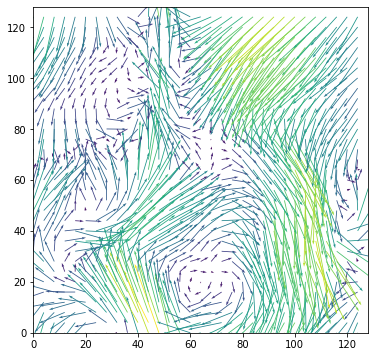

In [2]:
import matplotlib.pyplot as plt 
#%matplotlib inline  

x = np.linspace(0,NX-1,NX)
y = np.linspace(0,NY-1,NY) 
X, Y = np.meshgrid(x, y)
VX = vx[0][:][:]
VY = vy[0][:][:]

norm = np.sqrt(VX**2. + VY**2.)
norm_m = np.mean(norm)

fig = plt.figure(figsize = (6, 6))
 
# Plotting stream plot
step = 4
plt.quiver(X[::step,::step], Y[::step,::step], VX[::step,::step], VY[::step,::step], norm[::step,::step], 
           scale=1.e+1*norm_m)
 
plt.xlim([0, NX]) 
plt.ylim([0, NY]) 
    
#show plot
plt.show()

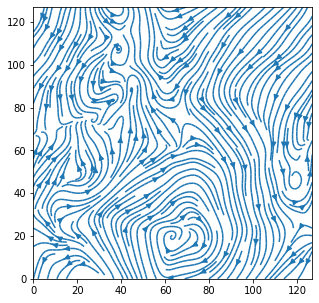

In [3]:
fig = plt.figure(figsize = (5, 5))
 
# Plotting stream plot
plt.streamplot(X, Y, VX, VY, density = 2.0)
 
#show plot
plt.show()

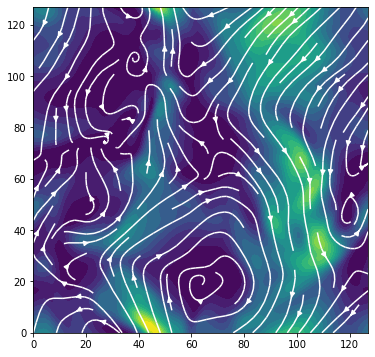

In [4]:
k = (vx**2. + vy**2.)/2.
k_slice = k[0][:][:]
k_min = 0
k_max = np.max(k_slice)

fig = plt.figure(figsize = (6, 6))
 
plt.contourf(k_slice, levels=np.linspace(k_min,k_max,20)) 
# Plotting stream plot
plt.streamplot(X, Y, VX, VY, density = 1., color="white")
    
# show plot
plt.show()

## The vorticity field 

we want to compute the vorticity field and make a graph of the same 2D slice used for the velocity.

First we compute the velocity gradients $\nabla \bf{u}$

In [5]:
# we can use this
#dvx = np.gradient(vx)
#dvy = np.gradient(vy)
#dvz = np.gradient(vz)
# more accurate 
dvx = np.gradient(vx,edge_order=2)
dvy = np.gradient(vy,edge_order=2)
dvz = np.gradient(vz,edge_order=2)

# check the gradients
#dxvx
print ( dvx[2][10][10][10] )
print ( (vx[10][10][11] - vx[10][10][9])/2. , "\n")

#dyvx
print ( dvx[1][10][10][10] )
print ( (vx[10][11][10] - vx[10][9][10])/2. )

0.0027352513535178714
0.0027352513535178714 

0.0021340909544092955
0.0021340909544092955


In [6]:
# we use more handy names
dxvx, dyvx, dzvx = dvx[2],dvx[1],dvx[0]
dxvy, dyvy, dzvy = dvy[2],dvy[1],dvy[0]
dxvz, dyvz, dzvz = dvz[2],dvz[1],dvz[0]

then we compute the rotational to get the vorticity : 
$\omega = \nabla \times \bf{u}$

In [7]:
# compute the vorticity 
omegax = dyvz - dzvy
omegay = dxvz - dzvx
omegaz = dyvx - dxvy  

The mean omega_z value is  2.7132938304399046e-07 +/- 0.004718451561438386
minimum value -0.03230217746260257
maximal value 0.018614588292633


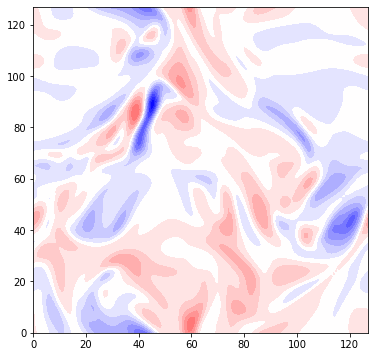

In [8]:
# here is the graph
omega_slice = omegaz[0][:][:]
omega_min = np.min(omega_slice)
omega_max = np.max(omega_slice)

m_omega = np.mean(omega_slice)
s_omega = np.std(omega_slice)
print("The mean omega_z value is ", m_omega, "+/-", s_omega)
print("minimum value", omega_min)
print("maximal value", omega_max)

omega_range = np.max(np.abs(omega_slice))

fig = plt.figure(figsize = (6, 6))
 
plt.contourf(omega_slice, levels=np.linspace(-omega_range,omega_range,20), cmap='bwr') 
    
# show plot
plt.show()

## Check the incompressibility of the velocity field

The computed divergence value is  1.820977119749888e-10 +/- 0.00012258980977188205
minimum value -0.0006633286366475259
maximal value 0.0009691468438975427


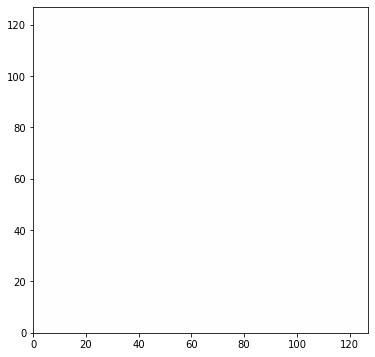

In [9]:
#compressibility check 
div = dxvx + dyvy + dzvz
m_div = np.mean(div)
s_div = np.std(div)
print("The computed divergence value is ", m_div, "+/-", s_div)

div_slice = div[0][:][:]
div_min = np.min(div_slice)
div_max = np.max(div_slice)
print("minimum value", div_min)
print("maximal value", div_max)
div_range = np.max(np.abs(div_slice))

fig = plt.figure(figsize = (6, 6))
 
plt.contourf(div_slice, levels=np.linspace(-omega_range,omega_range,20), cmap='bwr') 
    
# show plot
plt.show()

## Surface plot of the enstrophy

The enstrophy is defined as the square of the vorticity

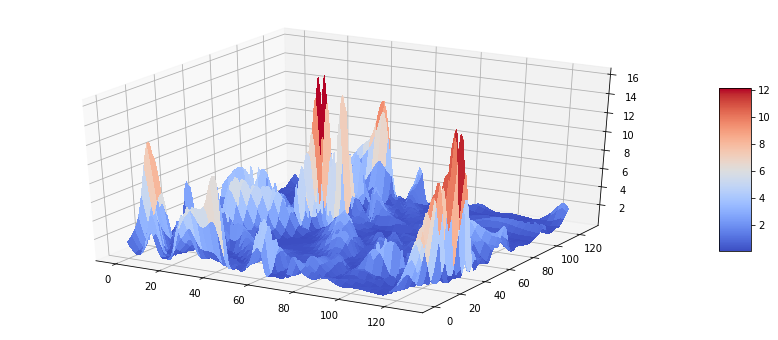

In [10]:
# compute the enstrophy in the slice
enst_slice = (omegax[0][:][:])**2. + (omegay[0][:][:])**2. + (omegaz[0][:][:])**2.

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize = (15, 6))

# Plot the surface.
surf = ax.plot_surface(X, Y, enst_slice/np.mean(enst_slice), cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# 3D vector fields and graphs

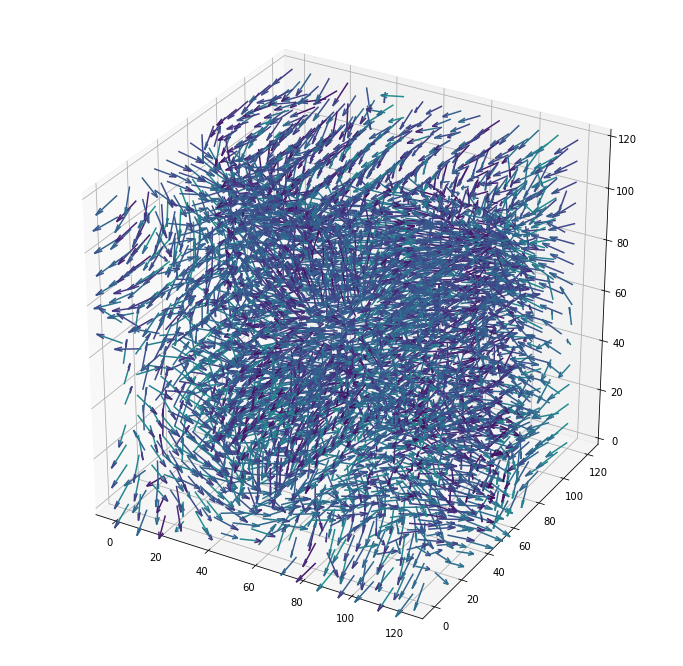

In [11]:
x = np.linspace(0,NX-1,NX)
y = np.linspace(0,NY-1,NY) 
z = np.linspace(0,NZ-1,NZ)
X, Y , Z = np.meshgrid(x, y, z)
VX = vx[:][:][:]
VY = vy[:][:][:]
VZ = vz[:][:][:]

norm = np.sqrt(VX**2. + VY**2. + VZ**2.)

# Now with arrow with colors
c=norm
# Flatten and normalize
c = (c.ravel() - c.min()) / c.ptp()
# Colormap see https://matplotlib.org/stable/users/explain/colors/colormaps.html
c = plt.cm.viridis(c)

plt.figure(figsize = (12, 12)).add_subplot(projection='3d')
# Plotting stream plot
stepi = 8
stepj = 8
stepk = 8
plt.quiver(X[::stepi,::stepj,::stepk],   Y[::stepi,::stepj,::stepk],  Z[::stepi,::stepj,::stepk], 
           VX[::stepi,::stepj,::stepk], VY[::stepi,::stepj,::stepk], VZ[::stepi,::stepj,::stepk],
           colors = c, length=10, normalize=True)
 
#show plot
plt.show()

## 3D isocontour plot

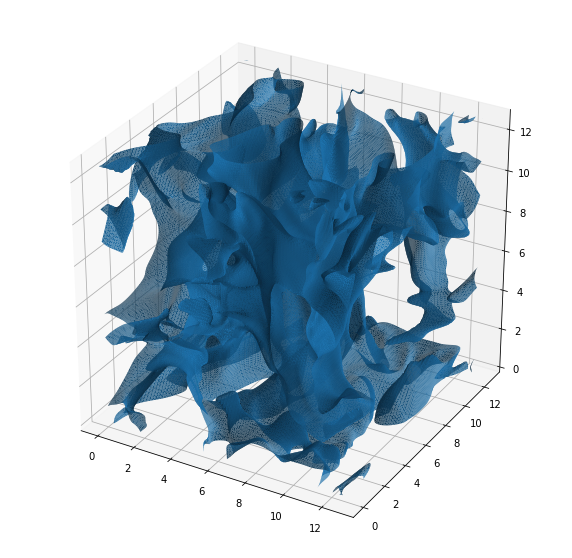

In [12]:
from skimage.measure import marching_cubes_lewiner
from mpl_toolkits.mplot3d import Axes3D

# kinetic energy plot 
vol = 0.5 * ( (vx)**2. + (vy)**2. + (vz)**2. )
iso_val=np.mean(vol)
verts, faces, _, _ = marching_cubes_lewiner(vol, iso_val, spacing=(0.1, 0.1, 0.1))

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], lw=1)

plt.show()

## Exercice :  The Lambda2 vortex identification method 

https://en.wikipedia.org/wiki/Lambda2_method

see also *J. Jeong and F. Hussain. On the Identification of a Vortex. J. Fluid Mechanics, 285:69-94, 1995*

compute the eigenvalue denoted as $\lambda_2$ and make a graph of it either in 2D (a slice) or in 3D).
Is it effective in identify a vortex?

In [13]:
lambda2 = np.zeros((NX,NY, NZ))

for i in range(NX):
    for j in range(NY):
        for k in range(NZ):
            
            gradv = np.array([[dxvx[k][j][i], dyvx[k][j][i], dzvx[k][j][i]], 
                          [dxvy[k][j][i], dyvy[k][j][i], dzvy[k][j][i]],
                          [dxvz[k][j][i], dyvz[k][j][i], dzvz[k][j][i]]] ) 
            
            gradvt= np.transpose(gradv)

            #print(gradv)
            #print(gradvt)
            S = 0.5*(gradv + gradvt)
            W = 0.5*(gradv - gradvt)
            
            # S^2 + W^2 
            S2pW2 = np.dot(S,S) + np.dot(W,W)

            #eigenvalues, eigencvectors = np.linalg.eig(S2pW2)
            #print(eigenvalues)

            eigen = np.linalg.eigvalsh(S2pW2)

            #print(eigen)
            
            lambda2[k][j][i] = eigen[1] 
            
            # second invariant of the velocity gradient tensor
            # this definition is equivalent
            # lambda2[k][j][i] = np.trace(np.dot(gradv,gradv)) 

isosurface value  -7.189074265852074e-05


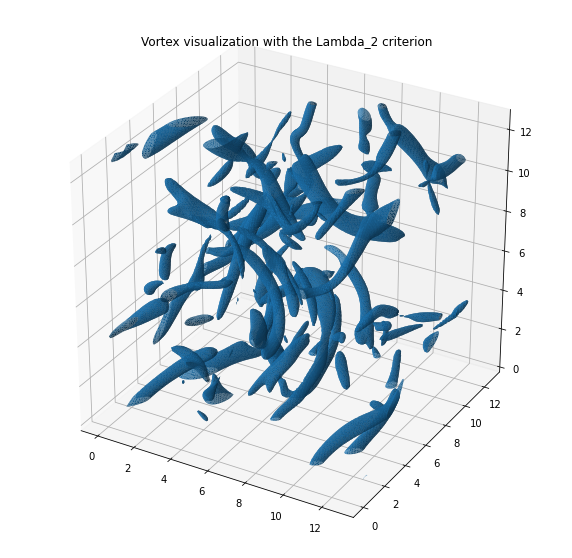

In [14]:
vol = lambda2
iso_val= 0.1 * np.min(vol)
print("isosurface value ",iso_val)

# we use the marching cube algorithm to compute the isosurface
# https://en.wikipedia.org/wiki/Marching_cubes
verts, faces, _, _ = marching_cubes_lewiner(vol, iso_val, spacing=(0.1, 0.1, 0.1))

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2], lw=1)

plt.title("Vortex visualization with the Lambda_2 criterion")

plt.show()